# 1. 이미지처리 고급과정 : 블렌딩 및 붙여넣기
- 블렝딩 : cs2.addWeighted() 함수 이용 / 가중치 할당해서 더한 후 새 픽셀로 출력
- 이미지 붙여넣기 : 하나의 이미지 위에 다른 이미지 오버레이

# 2. 이미지 블렌딩

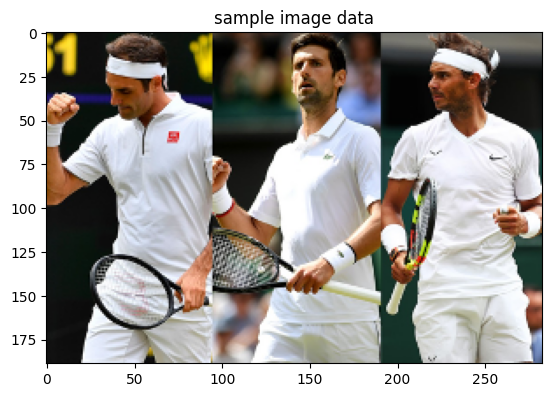

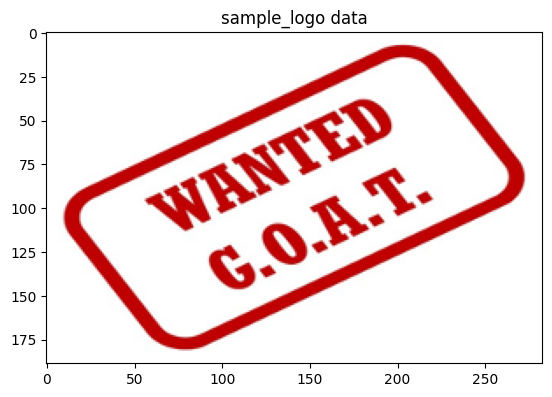

In [45]:
# 이미지 로드
import cv2 
import matplotlib.pyplot as plt 

sample_img = cv2.imread('ex_image.png')
sample_logo = cv2.imread('ex_image_logo.png')

sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_logo= cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

plt.imshow(sample_img)
plt.title('sample image data')
plt.show()

plt.imshow(sample_logo)
plt.title('sample_logo data')
plt.show()

(600, 800, 3) (600, 800, 3)


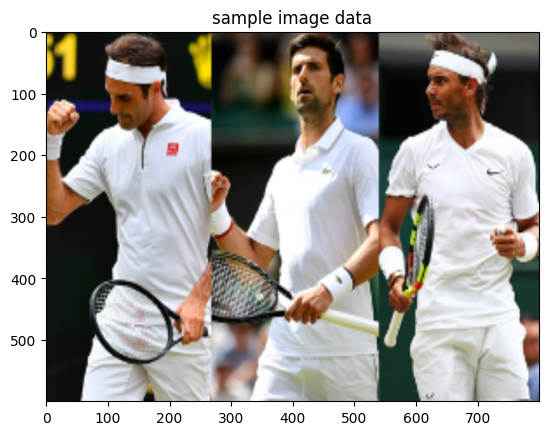

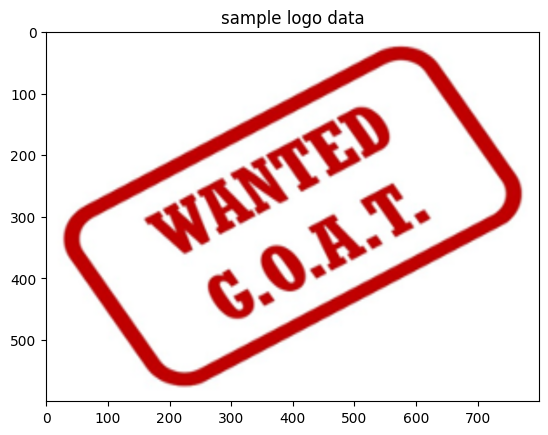

In [46]:
# 이미지 크기 수정
img1 = cv2.resize(sample_img, (800,600))
img2 = cv2.resize(sample_logo, (800,600))

# 이미지 크기 수정 여부 확인 체크
print(img1.shape, img2.shape)

# 수정된 이미지 확인
plt.imshow(img1)
plt.title('sample image data')
plt.show()

plt.imshow(img2)
plt.title('sample logo data')
plt.show()

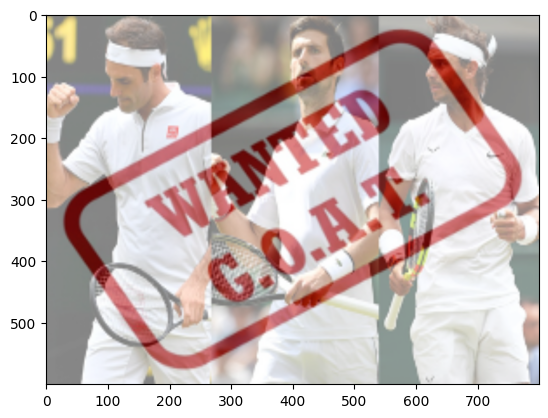

In [47]:
# 이미지 혼합 실습
blended = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)  

plt.imshow(blended)
plt.show()

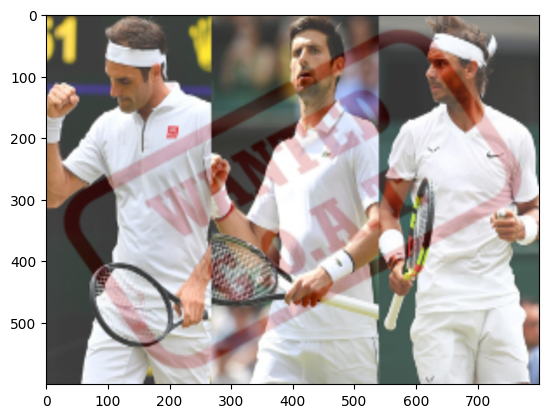

In [48]:
# 첫번째(테니스선수이미지) 이미지 강조형 블렌딩
blended = cv2.addWeighted(img1, 0.8, img2, 0.2, 0)  

plt.imshow(blended)
plt.show()

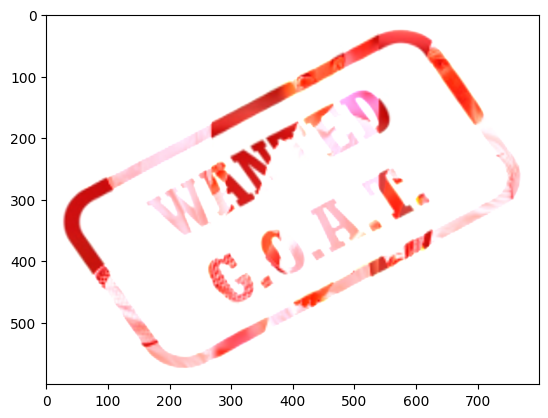

In [49]:
# 두번째이미지(Wnated) 강조형 블렌딩
blended = cv2.addWeighted(img1, 1, img2, 1, 0)  

plt.imshow(blended)
plt.show()

---

>## 1) 비트연산
- AND : 두 픽셀 모두 0보다 크면 참
- OR : 두 픽셀 중 하나가 0보다 크면 참
- XOR : 두 픽셀 중 하나만 0보다 큰 경우 참
- NOT : 픽셀값 반전
- 다양한 이미지 혼합 작업을 위함
- 회색조(grayscale)이 기본 

>>### (1) 비트연산 할 도형(사각형, 원) 생성

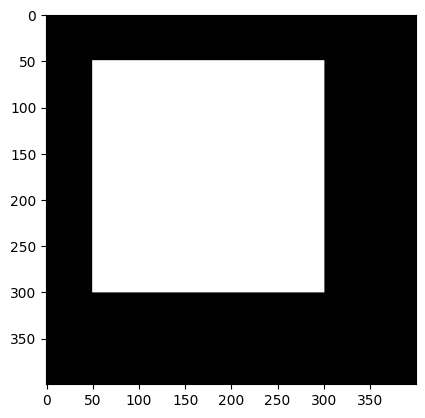

In [50]:
import numpy as np
img_rectangle = np.ones((400,400), dtype='uint8')
cv2.rectangle(img_rectangle, (50,50), (300,300), (255,255,255), -1)

plt.imshow(img_rectangle, 'gray')
plt.show()

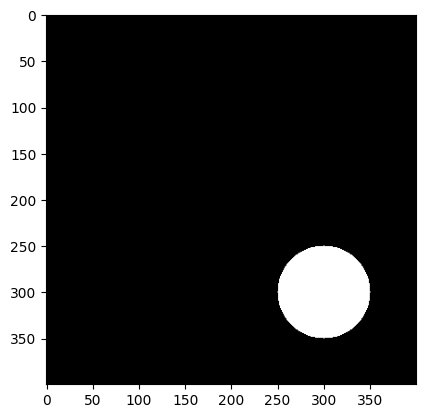

In [51]:
# 원 실습
img_circle = np.ones((400,400), dtype='uint8')
cv2.circle(img_circle, (300,300), 50, (255,255,255), -1)

plt.imshow(img_circle, 'gray')
plt.show()

>>### (2) or/and/not/xor 실습
- A : 1)에서 생성한 사각형
- B : 1)에서 생성한 원

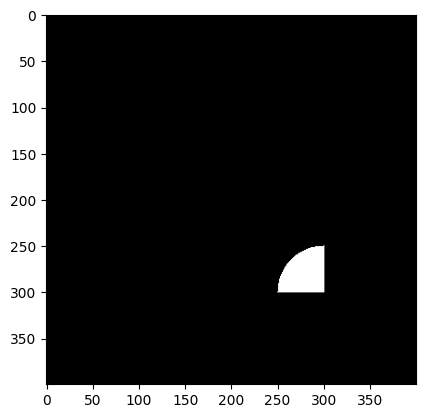

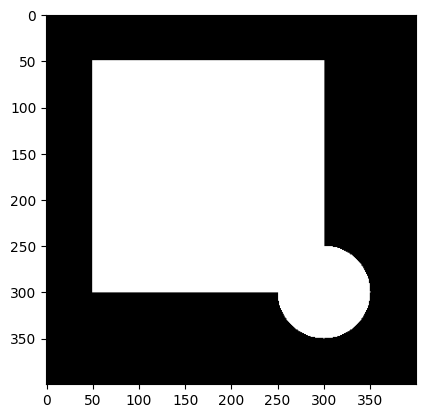

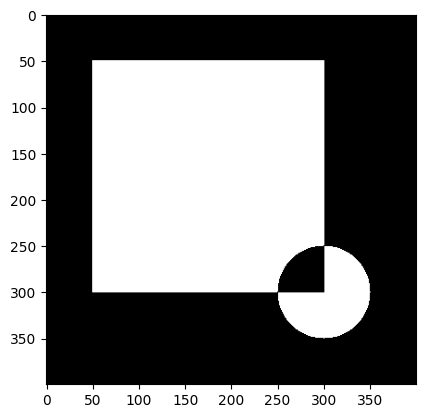

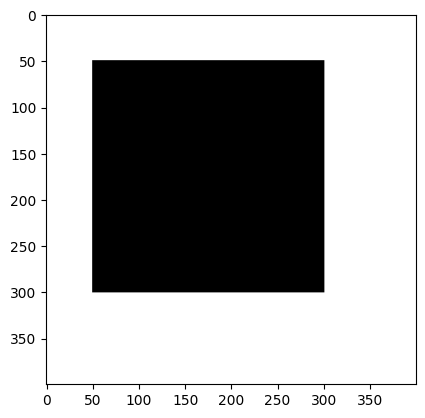

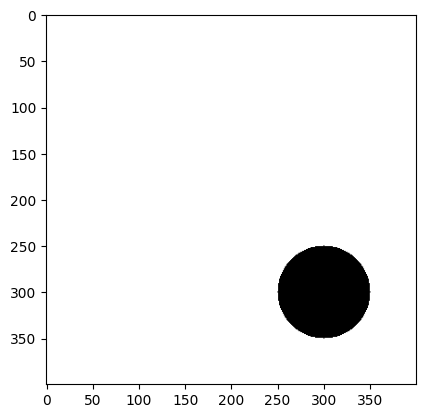

In [52]:
# AND 실습
bitwiseAnd = cv2.bitwise_and(img_rectangle, img_circle)
plt.imshow(bitwiseAnd, 'gray')
plt.show()

# OR 실습
bitwiseOr = cv2.bitwise_or(img_rectangle, img_circle)
plt.imshow(bitwiseOr, 'gray')
plt.show()

# XOR 실습
bitwiseXor = cv2.bitwise_xor(img_rectangle, img_circle)
plt.imshow(bitwiseXor, 'gray')
plt.show()

# Not A 실습
bitwiseNot_rec = cv2.bitwise_not(img_rectangle)
plt.imshow(bitwiseNot_rec, 'gray')
plt.show()

# Not B 실습
bitwiseNot_circ = cv2.bitwise_not(img_circle)
plt.imshow(bitwiseNot_circ, 'gray')
plt.show()

>>### (3) 마스킹
- 이미지의 특정 부분/영역만 집중하는 기능
- 이미지의 일부 강조, 나머지 부분 무시

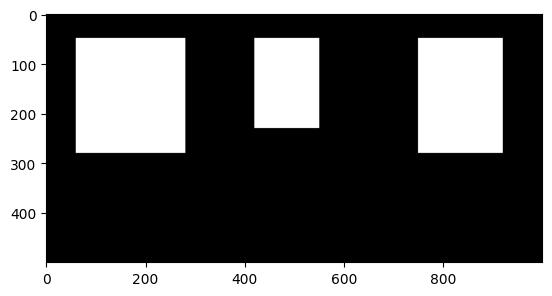

In [54]:
# 직사각형 그리기
img_rectangle = np.ones((500,1000), dtype='uint8')

masking = np.zeros(img_rectangle.shape, dtype='uint8')

# 그린 직사각형 안에 흰색 직사각형 추가
cv2.rectangle(masking, (60,50), (280,280), (255,255,255), -1)
cv2.rectangle(masking, (420,50), (550,230), (255,255,255), -1)
cv2.rectangle(masking, (750,50), (920,280), (255,255,255), -1)

plt.imshow(masking, 'gray')
plt.show()

# 3. 붙여넣기 : 블렌딩 없이 오버레이 
- 다양한 크기 혼합

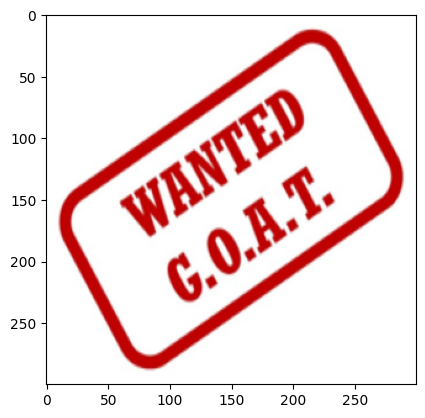

In [55]:
# 이미지 로드
import cv2 
import matplotlib.pyplot as plt 

sample_img = cv2.imread('ex_image.png')
sample_logo = cv2.imread('ex_image_logo.png')

sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_logo= cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

# 이미지 크기 수정
img1 = cv2.resize(sample_img, (800,600))
img2 = cv2.resize(sample_logo, (800,600))

# 붙여넣기용 이미지 크기 수정(더작게)
small_img2 = cv2.resize(img2, (300,300))
plt.imshow(small_img2)
plt.show()

- 작은 이미지 길이 + 오프셋값
- 튜플 반환하는 작은 이미지 모양 잡을 수 있음

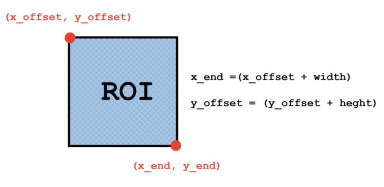

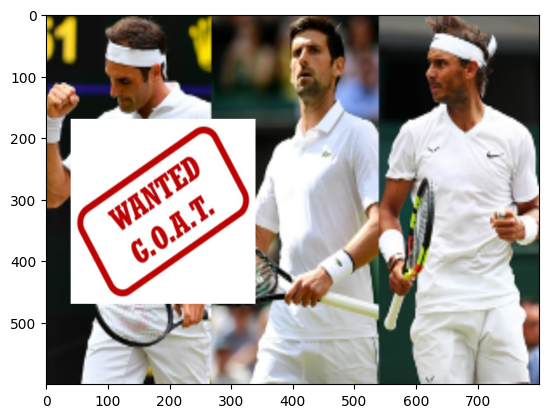

In [58]:
from re import S
x_offset = 40
y_offset = 170

x_end = x_offset + small_img2.shape[1]
y_end = y_offset + small_img2.shape[0]

img1[y_offset:y_end, x_offset:x_end] = small_img2

plt.imshow(img1)
plt.show()

# 4. 최종 : 워터마크 만들기
- 워터마크로 넣을 이미지 선택
- 배경 이미지의 특정 부분만 필터링 할 수 있도록 마스크 만들기 
- 워터마크로 넣을 다음 단계로 필터링 하도록 마스크 만들기
- 마스킹 된 이미지를 배경이미지에 오버레이하기

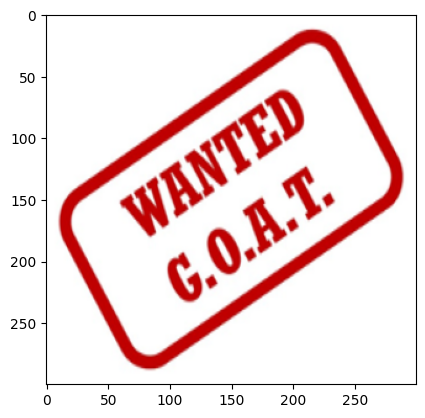

In [62]:
# 최종실습 : 워터마크 만들기
import cv2
import matplotlib.pyplot as plt

sample_img = cv2.imread('ex_image.png')
sample_logo = cv2.imread('ex_image_logo.png')

img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

# 워터마크 이미지 리사이즈 300x300
small_img = cv2.resize(watermark, (300,300))

# 워터마크 이미지 리사이즈 결과 확인
plt.imshow(small_img)
plt.show()

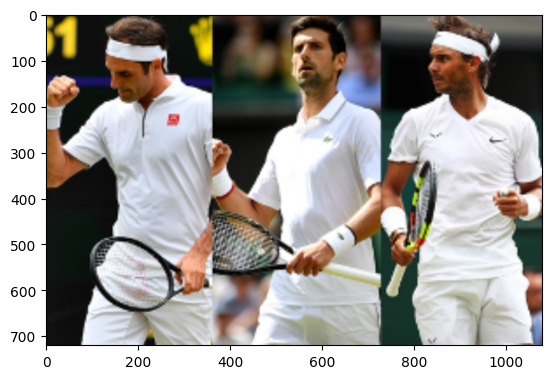

In [63]:
# 선수 이미지 사진 리사이즈 1080x720
resize_img = cv2.resize(img, (1080,720))

# 선수 이미지 사진 리사이즈 결과 확인
plt.imshow(resize_img)
plt.show()

- 관심영역(ROI) 결정 : 배경이미지에 워터마크 넣을 위치 결정
- 시작위치(offset) = ROI 왼쪽 상단 모서리 좌표

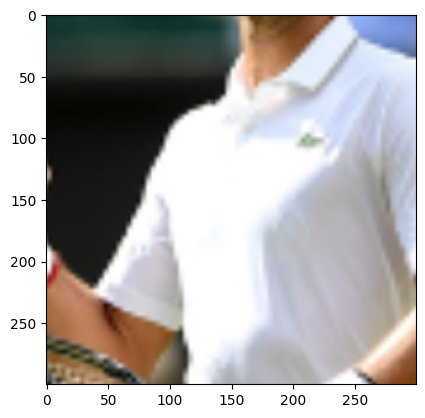

In [65]:
# 이미지 정보 가져오기 (가로 세로 채널)
height, width, channel = small_img.shape

x_offset = 400  # x 좌표(가로) 모서리 시작점
y_offset = 170  # y 좌표(세로) 모서리 시작점

roi = resize_img[y_offset:470, x_offset:700]
plt.imshow(roi)
plt.show()

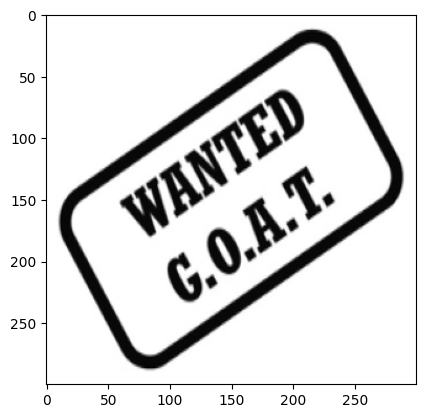

In [66]:
# 워터마크로 사용할 이미지 회색조로 변경 → 이미지의 모든 것 필터링 하도록
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)
plt.imshow(small_img_gray, 'gray')
plt.show()

- 이미지의 문자는 어두운 회색(검은색x)
- 바이너리 이미지 생성 위해 임계값 적용하는 이유

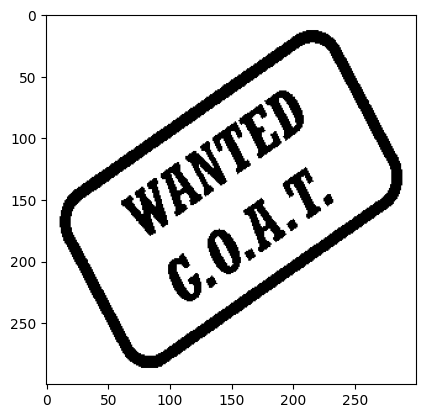

In [69]:
ret, mask = cv2.threshold(small_img_gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(mask, 'gray')
plt.show()

- 이미지 변경으로 바이너리 깨짐 현상 발생할 수 있음 

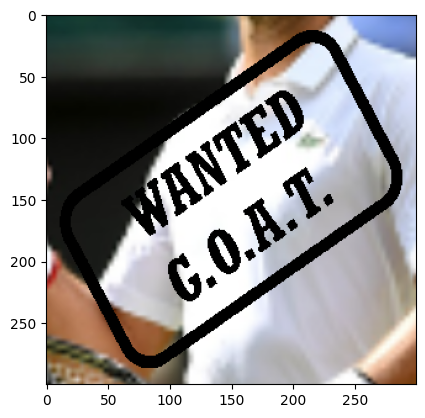

In [70]:
# cv2.bitwise_or 매개변수로 ROI와 마스크를 연산자에 전달
bg = cv2.bitwise_or(roi,roi,mask=mask)
plt.imshow(bg)
plt.show()

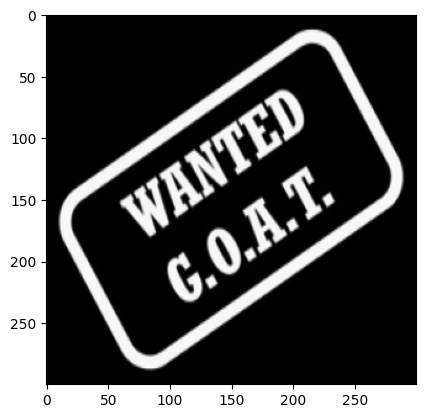

In [71]:
# 빨간색 워터마크가 있는 검은색 이미지 만들기
# 빨간색 가져오려면 마스크 반전 필요
mask_inv = cv2.bitwise_not(small_img_gray)

plt.imshow(mask_inv, 'gray')
plt.show()

- 빛의 연산자 : 이제 어느 색으로도 빛날 수 있음!

In [76]:
fg = cv2.bitwise_and(small_img, small_img, mask=mask_inv)

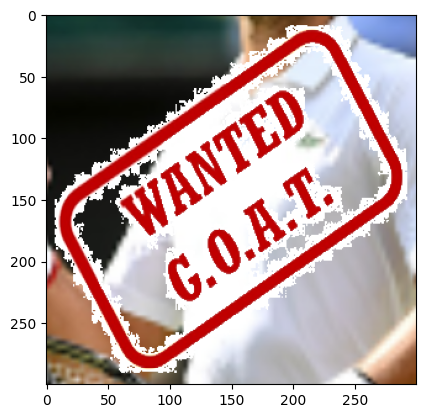

In [77]:
final_roi = cv2.add(bg,fg)

plt.imshow(final_roi)
plt.show()